# **Project Name**    -  Retail Sales Prediction

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member**     - **Mohd Tabish Khan**

# **Project Summary -**

##### The demand for a product or service keeps changing from time to time. No business can improve its financial performance without estimating customer demand and future sales of products/services accurately. Sales forecasting refers to the process of estimating demand for or sales of a particular product over a specific period of time. In this article I will show you how machine learning can be used to predict sales on a real-world business problem taken from Kaggle. This case study solves everything right from scratch. So, you will get to see each and every phase of how in the real world a case study is solved.

# **GitHub Link -**

# **Problem Statement**


We will use the rossman store sales database for this notebook. Following is the description of Data from the website:

"Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied."

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Dataset Loading

In [296]:
sales_data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Almabetter/Module_4/Capstone Project/data/store.csv")
rossmann_dataset = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Almabetter/Module_4/Capstone Project/data/Rossmann Stores Data.csv")

In [297]:
sales_data.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [298]:
rossmann_dataset.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [299]:
train = rossmann_dataset.merge(right=sales_data, on='Store', how='left')

In [300]:
train.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [301]:
req_cols = ['Store','Sales','Customers','Open','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionDistance','Promo','Promo2']

In [302]:
dataset = train[req_cols]

### Dataset First View

In [303]:
# Dataset First Look
dataset.head()

,Store,Sales,Customers,Open,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo,Promo2
0,1,5263,555,1,0,1,c,a,1270.0,1,0
1,2,6064,625,1,0,1,a,a,570.0,1,1
2,3,8314,821,1,0,1,a,a,14130.0,1,1
3,4,13995,1498,1,0,1,c,c,620.0,1,0
4,5,4822,559,1,0,1,a,a,29910.0,1,0


### Dataset Rows & Columns count

In [304]:
# Dataset Rows & Columns count
dataset.shape

(1017209, 11)

### Dataset Information

In [305]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Store                1017209 non-null  int64  
 1   Sales                1017209 non-null  int64  
 2   Customers            1017209 non-null  int64  
 3   Open                 1017209 non-null  int64  
 4   StateHoliday         1017209 non-null  object 
 5   SchoolHoliday        1017209 non-null  int64  
 6   StoreType            1017209 non-null  object 
 7   Assortment           1017209 non-null  object 
 8   CompetitionDistance  1014567 non-null  float64
 9   Promo                1017209 non-null  int64  
 10  Promo2               1017209 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 93.1+ MB


#### Duplicate Values

In [306]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

163305

#### Missing Values/Null Values

In [307]:
# Missing Values/Null Values Count
dataset.isnull().sum()

Store                     0
Sales                     0
Customers                 0
Open                      0
StateHoliday              0
SchoolHoliday             0
StoreType                 0
Assortment                0
CompetitionDistance    2642
Promo                     0
Promo2                    0
dtype: int64

<Axes: >

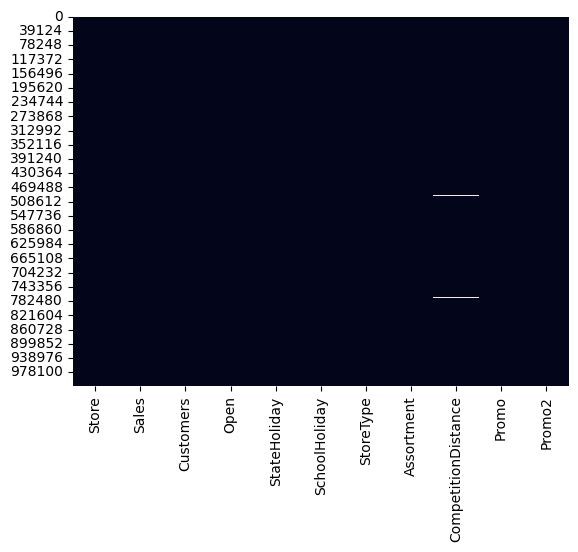

In [308]:
# Visualizing the missing values
sns.heatmap(dataset.isnull(), cbar=False)

### What did you know about your dataset?

##### We have a dataset of Rossmann retail store which shows us the sales of various retail store. We have 1017209 rows & 11 columns. As we can see from the above graph and statement our data have some duplicate values and null values which we will handle further.

## ***2. Understanding Your Variables***

In [309]:
# Dataset Columns
dataset.columns


Index(['Store', 'Sales', 'Customers', 'Open', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance', 'Promo', 'Promo2'],
      dtype='object')

In [310]:
# Dataset Describe
dataset.describe()

,Store,Sales,Customers,Open,SchoolHoliday,CompetitionDistance,Promo,Promo2
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,5.773819e+03,6.331459e+02,8.301067e-01,1.786467e-01,5.430086e+03,3.815145e-01,5.005638e-01
std,3.219087e+02,3.849926e+03,4.644117e+02,3.755392e-01,3.830564e-01,7.715324e+03,4.857586e-01,4.999999e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00
25%,2.800000e+02,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,7.100000e+02,0.000000e+00,0.000000e+00
50%,5.580000e+02,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,2.330000e+03,0.000000e+00,1.000000e+00
75%,8.380000e+02,7.856000e+03,8.370000e+02,1.000000e+00,0.000000e+00,6.890000e+03,1.000000e+00,1.000000e+00
max,1.115000e+03,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,7.586000e+04,1.000000e+00,1.000000e+00


### Variables Description

##### We have 1017209 rows & 11 columns and our dependant variable would be the Sales

### **Store**     - Store id

### **Sales**     - Sales made for the day

### **Customers** - Footfall for the day

### **Open**      - Open or closed

### **StateHoliday**  - State holiday or not

### **SchoolHoliday** - School holiday or not

### **StoreType**     - Types of store

### **Assortment**    - Types of assortment

### **CompetitionDistance** - Distance from the nearest competition

### **Promo** - Store running promotion or not

### **Promo2**  - Store running consecutive promotion or not

In [311]:
#copying data to preserve orignal file
df1= dataset.copy()

BIFURCATE DEPENDENT AND INDEPENDENT VARIABLES

In [312]:
independ_num_var = ['Customers', 'CompetitionDistance']
independ_cat_var = ['StoreType', 'Open','Assortment', 'Promo', 'Promo2','SchoolHoliday']
dep_var = 'Sales'

### Check Unique Values for each variable.

In [313]:
# Check Unique Values for each variable.
[dataset[col_name].unique() for col_name in dataset.columns]

[array([   1,    2,    3, ..., 1113, 1114, 1115]),
 array([ 5263,  6064,  8314, ...,   660, 17815, 23303]),
 array([ 555,  625,  821, ..., 3900,   36, 4065]),
 array([1, 0]),
 array(['0', 'a', 'b', 'c', 0], dtype=object),
 array([1, 0]),
 array(['c', 'a', 'd', 'b'], dtype=object),
 array(['a', 'c', 'b'], dtype=object),
 array([1.270e+03, 5.700e+02, 1.413e+04, 6.200e+02, 2.991e+04, 3.100e+02,
        2.400e+04, 7.520e+03, 2.030e+03, 3.160e+03, 9.600e+02, 1.070e+03,
        1.300e+03, 4.110e+03, 3.270e+03, 5.000e+01, 1.384e+04, 3.240e+03,
        2.340e+03, 5.500e+02, 1.040e+03, 4.060e+03, 4.590e+03, 4.300e+02,
        2.300e+03, 6.000e+01, 1.200e+03, 2.170e+03, 4.000e+01, 9.800e+03,
        2.910e+03, 1.320e+03, 2.240e+03, 7.660e+03, 5.400e+02, 4.230e+03,
        1.090e+03, 2.600e+02, 1.800e+02, 1.180e+03, 2.900e+02, 4.880e+03,
        9.710e+03, 2.700e+02, 1.060e+03, 1.801e+04, 6.260e+03, 1.057e+04,
        4.500e+02, 3.036e+04, 7.170e+03, 7.200e+02, 6.620e+03, 4.200e+02,
        7.340

## 3. ***Data Wrangling***

### Data Wrangling Code

### Checking the categorical variables

##### State Holidays

In [314]:
dataset['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [317]:
dataset.drop_duplicates(inplace = True)

### What all manipulations have you done and insights you found?

##### As we can see from above that the stateholiday column supposed to have boolean values but it has some absurd values inspite it is an important column we have to remove it from the data and we have removed duplicates from the data as they are of no use in the analysis


KeyError: ignored

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

**UNIVARIATE ANALYSIS**

We will take a look at distribution plots of our features.

DEPENDENT VARIABLE

<Axes: xlabel='Sales', ylabel='Density'>

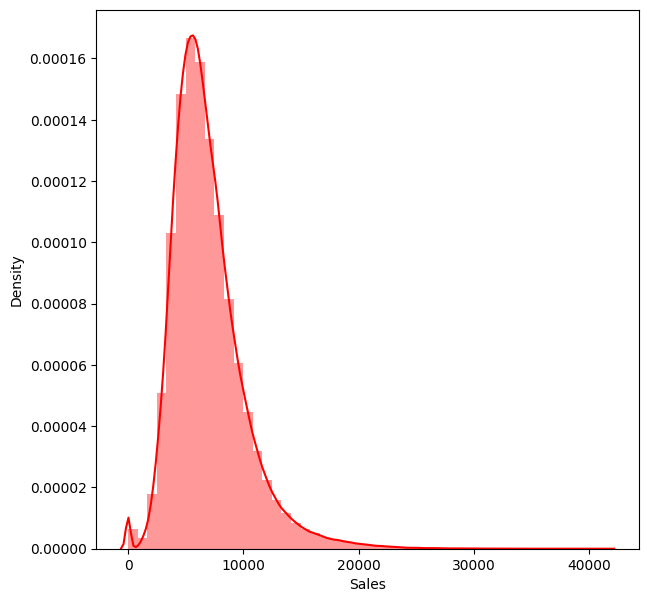

In [319]:
# Chart - 1 visualization code

#plots for independent variables

# Dependent variable 'Sales'
plt.figure(figsize=(7,7))
sns.distplot(dataset['Sales'],color="r")

##### 1. Why did you pick the specific chart?

##### The histogram is a popular graphing tool. It is used to summarize discrete or continuous data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

##### Thus, I used the histogram plot to analyse the dependant variable. I used Histogram and which helped me to get the density distribution of the Sales.

##### 2. What is/are the insight(s) found from the chart?

##### The histogram shows us the Sales is normally distributed

##### 3. Will the gained insights help creating a positive business impact?
##### Are there any insights that lead to negative growth? Justify with specific reason.

##### The histogram shows the dependant variable is normally distributed and we do not need to apply any transformation.

### CHART 2

### **Bi-Varitae Analysis**



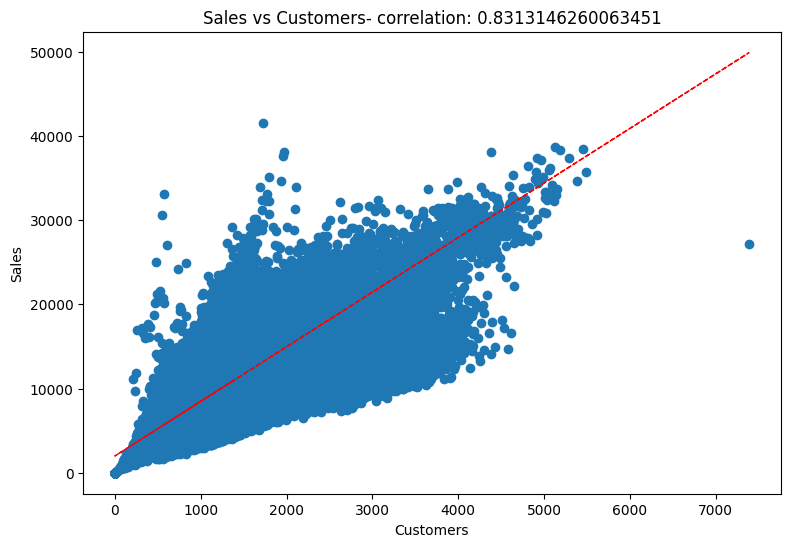

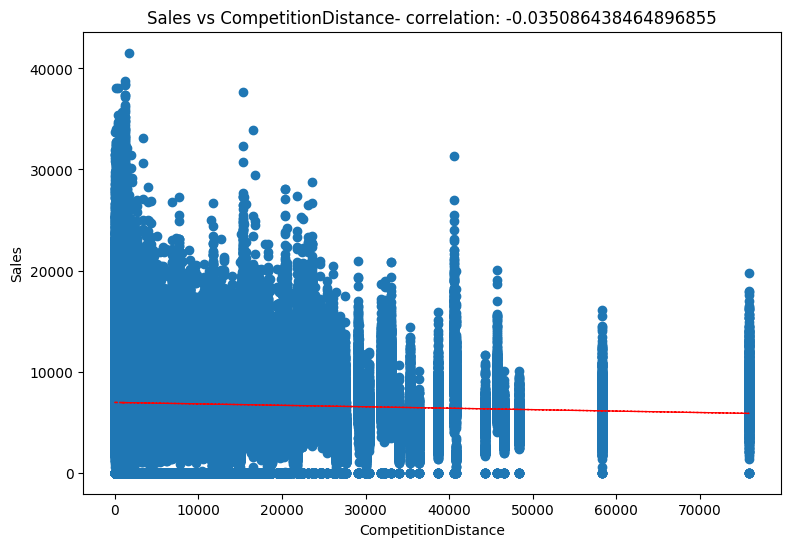

In [206]:
for col in independ_num_var:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['Sales'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

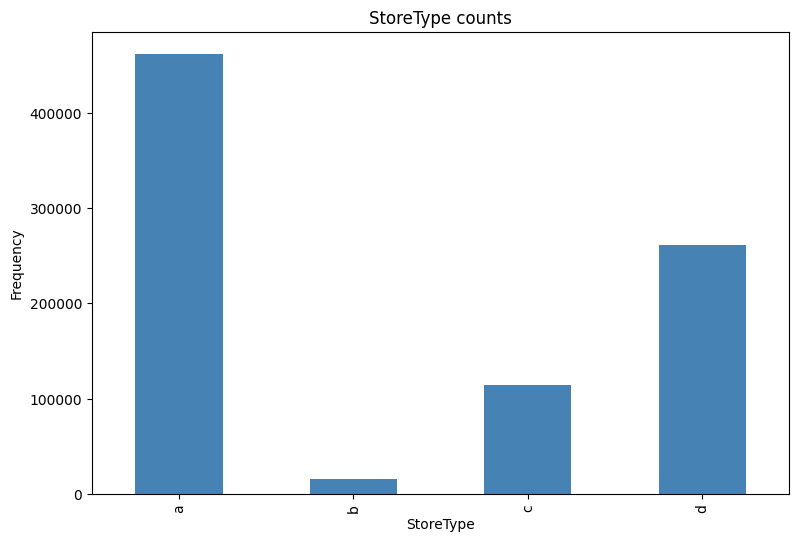

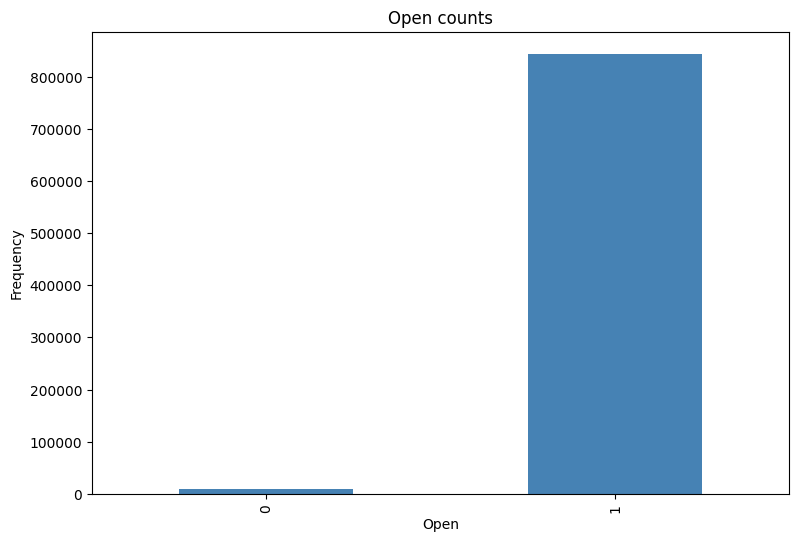

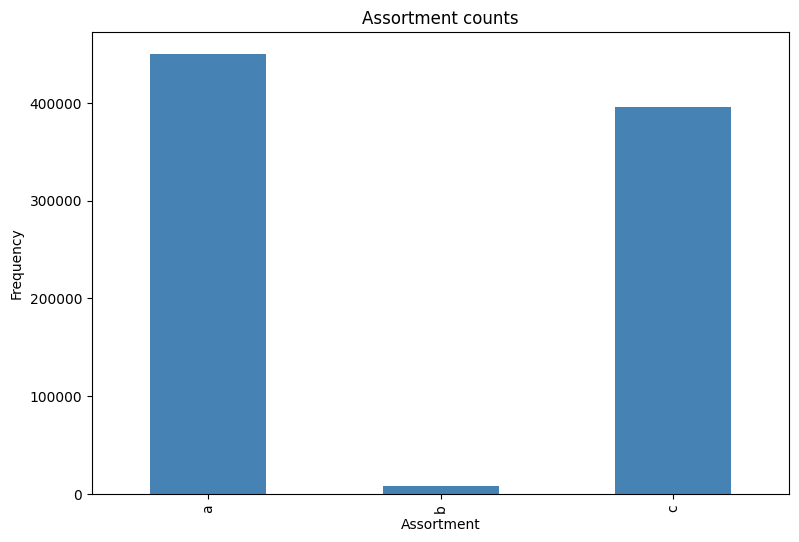

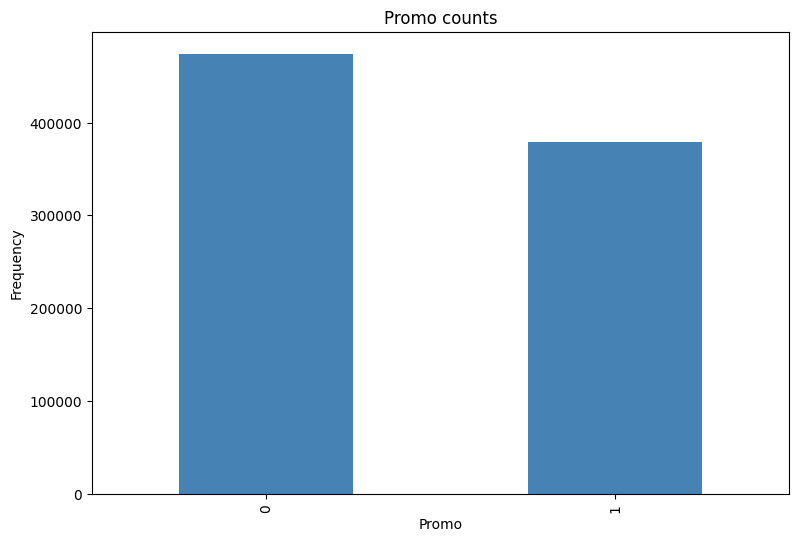

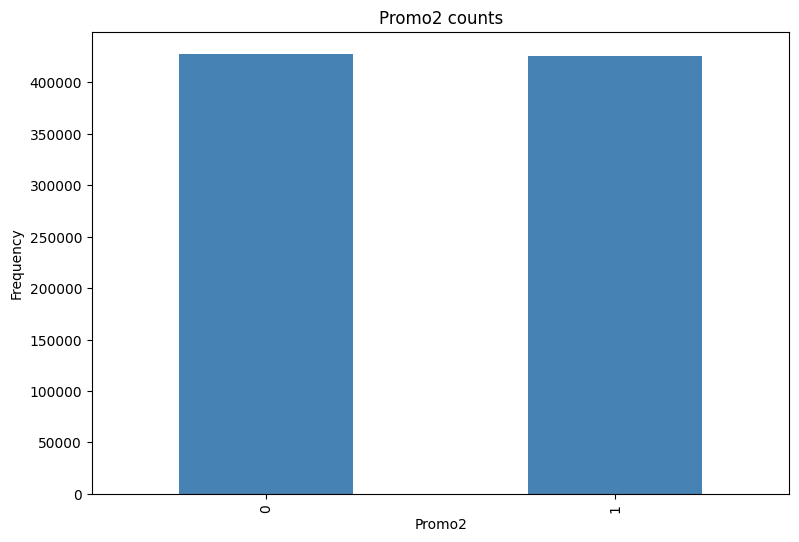

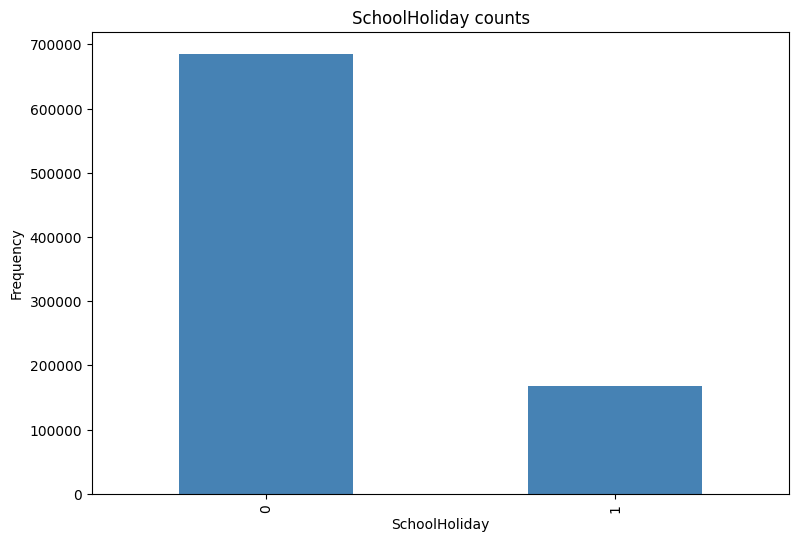

In [211]:
for col in independ_cat_var:
    counts = dataset[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
plt.show()

#### Chart - 4 - Correlation Heatmap

<Axes: >

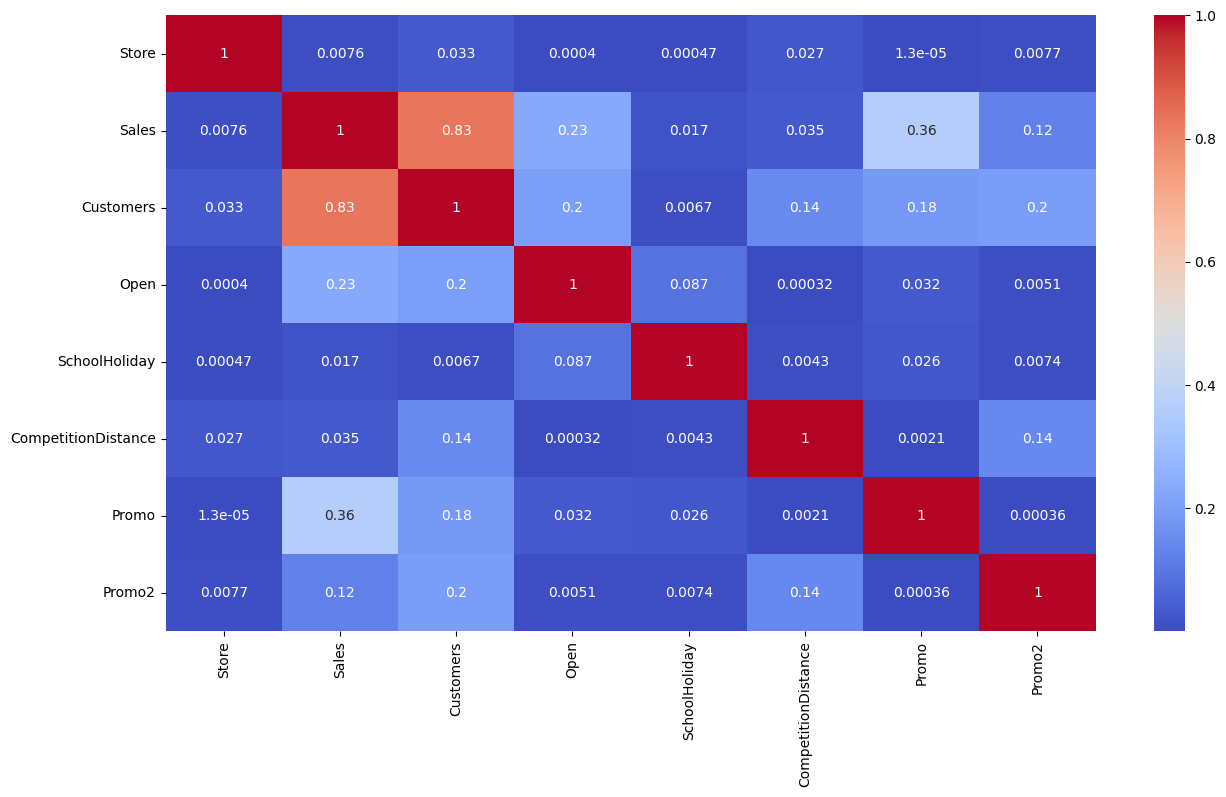

In [207]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

##### A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

##### Thus to know the correlation between all the variables along with the correlation coeficients, I used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

##### From the above correlation heatmap, we can see all the variables are positively correlated with the dependant variable.

##### Rest all correlation can be depicted from the above chart.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [320]:
dataset.isnull().sum()

Store                     0
Sales                     0
Customers                 0
Open                      0
SchoolHoliday             0
StoreType                 0
Assortment                0
CompetitionDistance    2194
Promo                     0
Promo2                    0
dtype: int64

In [333]:
dataset.fillna(dataset['CompetitionDistance'].mean(), inplace = True)

In [334]:
dataset['CompetitionDistance'] = dataset['CompetitionDistance'].astype('int')

In [335]:
dataset.isnull().sum()

Store                  0
Sales                  0
Customers              0
Open                   0
SchoolHoliday          0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo                  0
Promo2                 0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

##### I have imputated the mean of the competitiondistance in the missing values as it is an important feature so we if drop the na's then it will effect our data as weel.


### 3. Categorical Encoding

In [336]:
one_hot_encoded_data = pd.get_dummies(dataset, columns = ['StoreType','Assortment'])
one_hot_encoded_data

,Store,Sales,Customers,Open,SchoolHoliday,CompetitionDistance,Promo,Promo2,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5263,555,1,1,1270,1,0,0,0,1,0,1,0,0
1,2,6064,625,1,1,570,1,1,1,0,0,0,1,0,0
2,3,8314,821,1,1,14130,1,1,1,0,0,0,1,0,0
3,4,13995,1498,1,1,620,1,0,0,0,1,0,0,0,1
4,5,4822,559,1,1,29910,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,3375,566,1,1,150,0,0,0,1,0,0,1,0,0
1016827,733,10765,2377,1,1,860,0,0,0,1,0,0,0,1,0
1016863,769,5035,1248,1,1,840,0,1,0,1,0,0,0,1,0
1017042,948,4491,1039,1,1,1430,0,0,0,1,0,0,0,1,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

##### I have used 1 hot enconding in this dataset as this helps us in finding which category is most influential.

### 4. Feature Manipulation & Selection

In [337]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [342]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,3.016865
1,Customers,3.045034
2,SchoolHoliday,1.220881
3,CompetitionDistance,1.349015
4,Promo,1.835715
5,Promo2,1.685719


##### As we know if the store is open then only we can have sales from that store so it is clear that the variable open is not important and has some collinearity with other columns so removing it.

In [340]:
dataset.drop('Open', axis =1 , inplace = True)

In [341]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,3.016865
1,Customers,3.045034
2,SchoolHoliday,1.220881
3,CompetitionDistance,1.349015
4,Promo,1.835715
5,Promo2,1.685719


##### What all feature selection methods have you used  and why?

##### I have ony used VIF for the feature selection as it gives us information if there is any multicollinearity preset between the x variables or not.


DATAFRAME TO STORE EVALUATION METRICS

I will store the evaluation metrics for each regression model into this data frame to compare at the end.

##### Which all features you found important and why?

##### I have found the variabe SchoolHoliday, CompetitionDistance, Promo, Promo2,Store, Customers important as the VIF is less than  for them which means there is not much collinearity present in the data.

In [351]:
#empty data frame creation
i=0
error_df=pd.DataFrame()

### 5. Data Transformation

##### Finalising the X variables, data transformation and scaling of data.


In [343]:
X = one_hot_encoded_data[['Store', 'Customers', 'SchoolHoliday', 'CompetitionDistance', 'Promo', 'Promo2', 'StoreType_a', 'StoreType_b', 'StoreType_c','StoreType_d', 'Assortment_a', 'Assortment_b', 'Assortment_c']].apply(zscore)

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

##### Yes, the data transformation and scaling is impportant as the variables are on different scales so we need to transform and scaled the data to the same scale so our model can train perfectly on it.

##### I have normalised the data using z-trnasformation as it uses the mean and standard deviation of the data as if we use the standard transformation which uses min-max then as we can see our various variables have mis as 0 and max as 1 which do not make our data transformed as we need it.


### Spliting the data into test and train

In [238]:
# spliting the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(683123, 13)
(170781, 13)


## ***7. ML Model Implementation***

In [385]:
# ML Model - 1 Implementation
reg = LinearRegression()

# Fit the algorithm
reg = reg.fit(X_train, y_train)

#Predict on the model
y_pred = reg.predict(X_test)

In [386]:
reg.score(X_train, y_train)

0.8293557186388852

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [387]:
#evaluation metrics

MAE=mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MAE : 951.4825588996391
MSE : 1720586.3666027314
RMSE : 1311.7112359824976
R2 : 0.8296495121609118
Adjusted R2 :  0.8296365438687833


In [388]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='Linear regression'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"R2"]=round(r2,2)
error_df.loc[i,"Adjusted R2"]=round(1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),2)

i=i+1

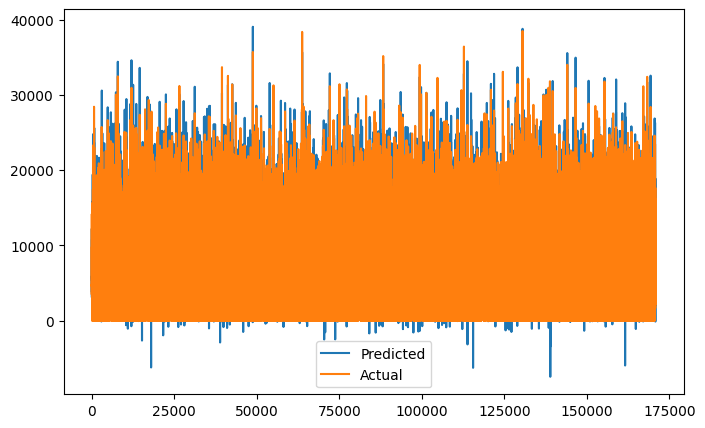

In [389]:
plt.figure(figsize=(8,5))
plt.plot((y_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

### ML Model - 2

## **LASSO Regression**

In [390]:
# Fitting the Data

lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

lasso.score(X_train, y_train)

0.8293565513819172

In [391]:
#evaluation metrics

MAE=mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MAE : 951.4825588996391
MSE : 1720586.3666027314
RMSE : 1311.7112359824976
R2 : 0.8296495121609118
Adjusted R2 :  0.8296365438687833


In [392]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='Lasso regression'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"R2"]=round(r2,2)
error_df.loc[i,"Adjusted R2"]=round(1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),2)

i=i+1

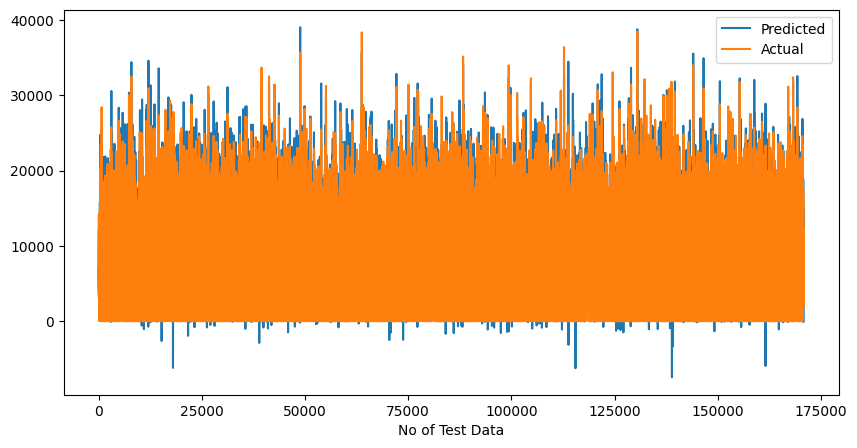

In [393]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [394]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

# Fit the Algorithm
lasso_regressor.fit(X_train, y_train)
# Predict on the model
y_pred = lasso_regressor.predict(X_test)

In [395]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0014}

Using  {'alpha': 0.0014}  the negative mean squared error is:  -1718507.2429049774


In [396]:
# Visualizing evaluation Metric Score chart

MSE  = mean_squared_error((y_test),(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1720608.2581645076
RMSE : 1311.719580613367
R2 : 0.8296473447380492
Adjusted R2 :  0.8296343762809211


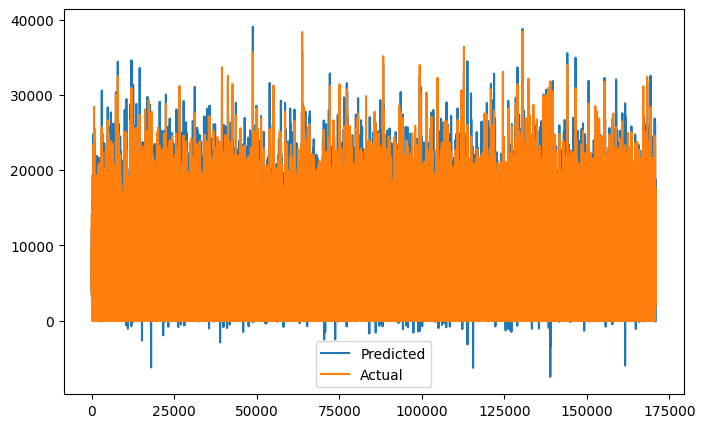

In [397]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_lasso))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

##### I have used the GridSearchCV optimization technique as it splits the data further and find the best fit model.

##### Have you seen any improvement? Note down the improvement with updates

*   List item
*   List item

No improvement

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**MSE** : It is most common used metrics in regression as it uses the mean of sum of error which do not cancel out the negative residual in the data

**RMSE** : Root mean square error also provides us the error which our model is giving and if it is large then the model is not the best fit.

**R-square** : R-sqr is providing us how good the model is fitting and giving the prediction as it is around 83% which means our model is performing very well.

# **ML MODEL - 3:  Ridge**

In [398]:
# ML Model - 3 Implementation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)

# Fit the algorithm
ridge_regressor.fit(X_train,y_train)

# Predict on the model
y_pred_ridge = ridge_regressor.predict(X_test)

In [399]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -1718467.83572


In [400]:
MSE  = mean_squared_error((y_test), (y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1720608.2105789036
RMSE : 1311.7195624747324
R2 : 0.8296473494493679
Adjusted R2 :  0.8296343809925983


In [401]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='Ridge regression'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"MAPE"]=round(MAPE,2)

i=i+1

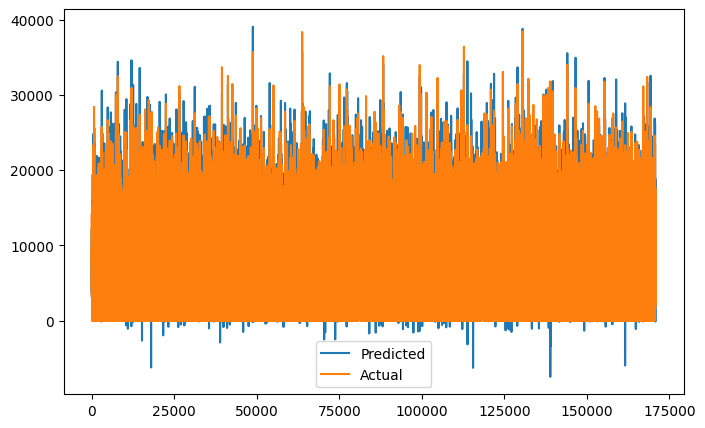

In [402]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [403]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

# Fit the Algorithm
ridge_regressor.fit(X_train, y_train)
# Predict on the model
y_pred = ridge_regressor.predict(X_test)

In [404]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -1718507.2374702063


In [405]:
MSE  = mean_squared_error((y_test), (y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1720608.2105789036
RMSE : 1311.7195624747324
R2 : 0.8296473494493679
Adjusted R2 :  0.8296343809925983


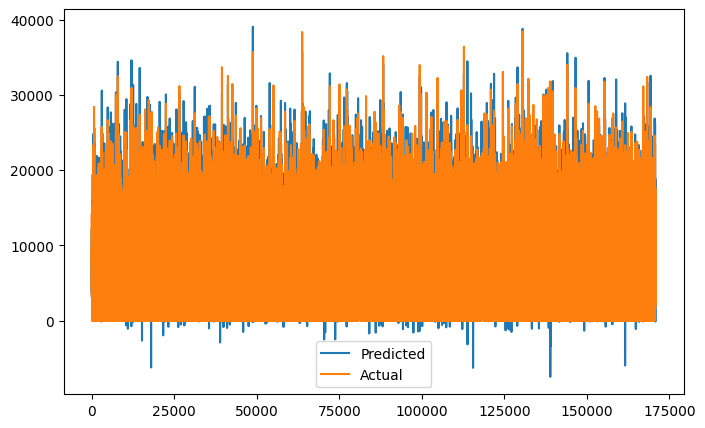

In [406]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

##### I have used the GridSearchCV optimization technique as it splits the data further and find the best fit model.

##### Have you seen any improvement? Note down the improvement with updates

*   List item
*   List item

No improvement

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**MSE** : It is most common used metrics in regression as it uses the mean of sum of error which do not cancel out the negative residual in the data

**RMSE** : Root mean square error also provides us the error which our model is giving and if it is large then the model is not the best fit.

**R-square** : R-sqr is providing us how good the model is fitting and giving the prediction as it is around 83% which means our model is performing very well.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

#### I have considered R-square for the positive business impact as it shows that our model has captured around 83% of the information for the data and it is providing good results on the unseen data.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

#### I have selected he lasso regression as my final prediction model as it obtain subset of predictors that minimizes prediction error for a quantitative variable.

In [407]:
#sorting metrics
error_df.sort_values(by=['MAE'],ascending=True,inplace=True)

In [408]:
error_df

,Model_Name,MAE,MSE,RMSE,MAPE,R2,Adjusted R2
0,Linear regression,951.48,1720586.37,1311.71,inf,NaN,NaN
1,Lasso regression,951.48,1720586.37,1311.71,inf,NaN,NaN
2,Ridge regression,951.48,1720608.26,1311.72,inf,NaN,NaN
3,Ridge regression,951.48,1720608.21,1311.72,inf,NaN,NaN
4,Linear regression,951.48,1720608.21,NaN,NaN,0.83,0.83
6,Linear regression,951.48,1720586.37,NaN,NaN,0.83,0.83
7,Lasso regression,951.48,1720586.37,NaN,NaN,0.83,0.83
8,Ridge regression,951.48,1720608.21,1311.72,inf,NaN,NaN
5,Lasso regression,951.50,1720608.26,NaN,NaN,0.83,0.83


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [411]:
# Save the File
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(lasso_regressor, f)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.

In [412]:
# Load the File and predict unseen data.

with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)


clf2.predict(X_test[5:10])

array([ 6267.48662218,  6809.63495516,  7681.09430143,  7155.8008054 ,
       12205.4715844 ])

# **Conclusion**

#### 1.The target variable is highly dependent on input variables.

#### 2.Ridge, Lasso and Linear Regression has given the best results with lowest MAE, MSE, RMSE and MAPE scores.

#### 3.The accuracy for each model is around 83% and it gives good prediction.